In [1]:
%run '../00_rh_settings.ipynb'
%run '../00_rh_load_processed.ipynb'

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_df = df

In [3]:
train_df.head(10)

,Unnamed: 0,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,...,past_billings_cnt,score_1,score_2,age,gender,bad_flag,dpd,first_loanfirst_overdue_date,rep_loan_datefirst_loan,rep_loan_datefirst_overdue_date
0,0,708382,644,316,0.0,0.0,0.0,0.0,3.0,region_6,...,10.0,0.0,0.0,21.0,False,0,0.0,316.0,328,644.0
1,1,406305,450,270,1.0,0.0,0.0,394.0,0.0,region_6,...,5.0,0.0,0.0,20.0,False,0,5.0,-124.0,180,56.0
2,2,779736,668,354,0.0,0.0,0.0,0.0,2.0,region_1,...,5.0,0.0,0.0,19.0,False,0,0.0,354.0,314,668.0
3,3,556376,545,180,0.0,0.0,0.0,0.0,1.0,region_6,...,6.0,0.0,0.0,21.0,False,0,0.0,180.0,365,545.0
4,4,266968,334,214,0.0,0.0,0.0,0.0,0.0,region_5,...,3.0,0.0,0.0,33.0,False,0,0.0,214.0,120,334.0
5,5,697186,639,241,0.0,0.0,0.0,0.0,2.0,region_3,...,5.0,0.0,0.0,34.0,False,0,0.0,241.0,398,639.0
6,6,347907,413,157,1.0,0.0,0.0,309.0,2.0,region_3,...,8.0,0.0,0.0,32.0,False,0,5.0,-152.0,256,104.0
7,7,256097,326,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5.0,0.0,0.0,23.0,False,1,20.0,-155.0,172,17.0
8,8,670540,627,336,3.0,1.0,0.0,379.0,1.0,region_2,...,6.0,0.0,0.0,33.0,False,0,30.0,-43.0,291,248.0
9,9,254453,325,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5.0,0.0,0.0,23.0,False,1,20.0,-155.0,171,16.0


In [4]:
df.apply(lambda x: x.isna().sum())
#df.apply(lambda x: x.isna().sum())

Unnamed: 0                          0
loanKey                             0
rep_loan_date                       0
first_loan                          0
dpd_5_cnt                           0
dpd_15_cnt                          0
dpd_30_cnt                          0
first_overdue_date                  0
close_loans_cnt                    15
federal_district_nm                11
TraderKey                           0
payment_type_0                      0
payment_type_1                      0
payment_type_2                      0
payment_type_3                      0
payment_type_4                      0
past_billings_cnt                   0
score_1                             0
score_2                             0
age                                 0
gender                              0
bad_flag                            0
dpd                                 0
first_loanfirst_overdue_date        0
rep_loan_datefirst_loan             0
rep_loan_datefirst_overdue_date     0
dtype: int64

In [5]:
from sklearn.externals import joblib
cbmft = joblib.load('../../models/scoring_model.joblib') 

In [6]:
test_row = df.query("loanKey == 256097")
true_y = test_row["bad_flag"]
test_row = test_row.drop(columns="bad_flag")
test_row.drop(columns=['Unnamed: 0',"loanKey"], inplace=True, errors="ignore")
test_row

,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,...,payment_type_4,past_billings_cnt,score_1,score_2,age,gender,dpd,first_loanfirst_overdue_date,rep_loan_datefirst_loan,rep_loan_datefirst_overdue_date
7,326,154,1.0,1.0,0.0,309.0,0.0,region_3,Trader_6,0,...,0,5.0,0.0,0.0,23.0,False,20.0,-155.0,172,17.0


In [7]:
cbmft.result.get("model_fit").predict_proba(test_row)

array([[0.17676168, 0.82323832]])

In [8]:
cbmft.result.get("model_fit").predict(test_row)

array([1.])

In [9]:
true_y

7    1
Name: bad_flag, dtype: int64

In [16]:
df.dropna(inplace=True)
y = df["bad_flag"]
X = df.drop(columns=["bad_flag",'Unnamed: 0',"loanKey"], errors="ignore")

In [17]:
#y_score = cbmft.result.get("model_fit").decision_function(X)

*Warning: this is not test-sample!*

0.9772253215578883

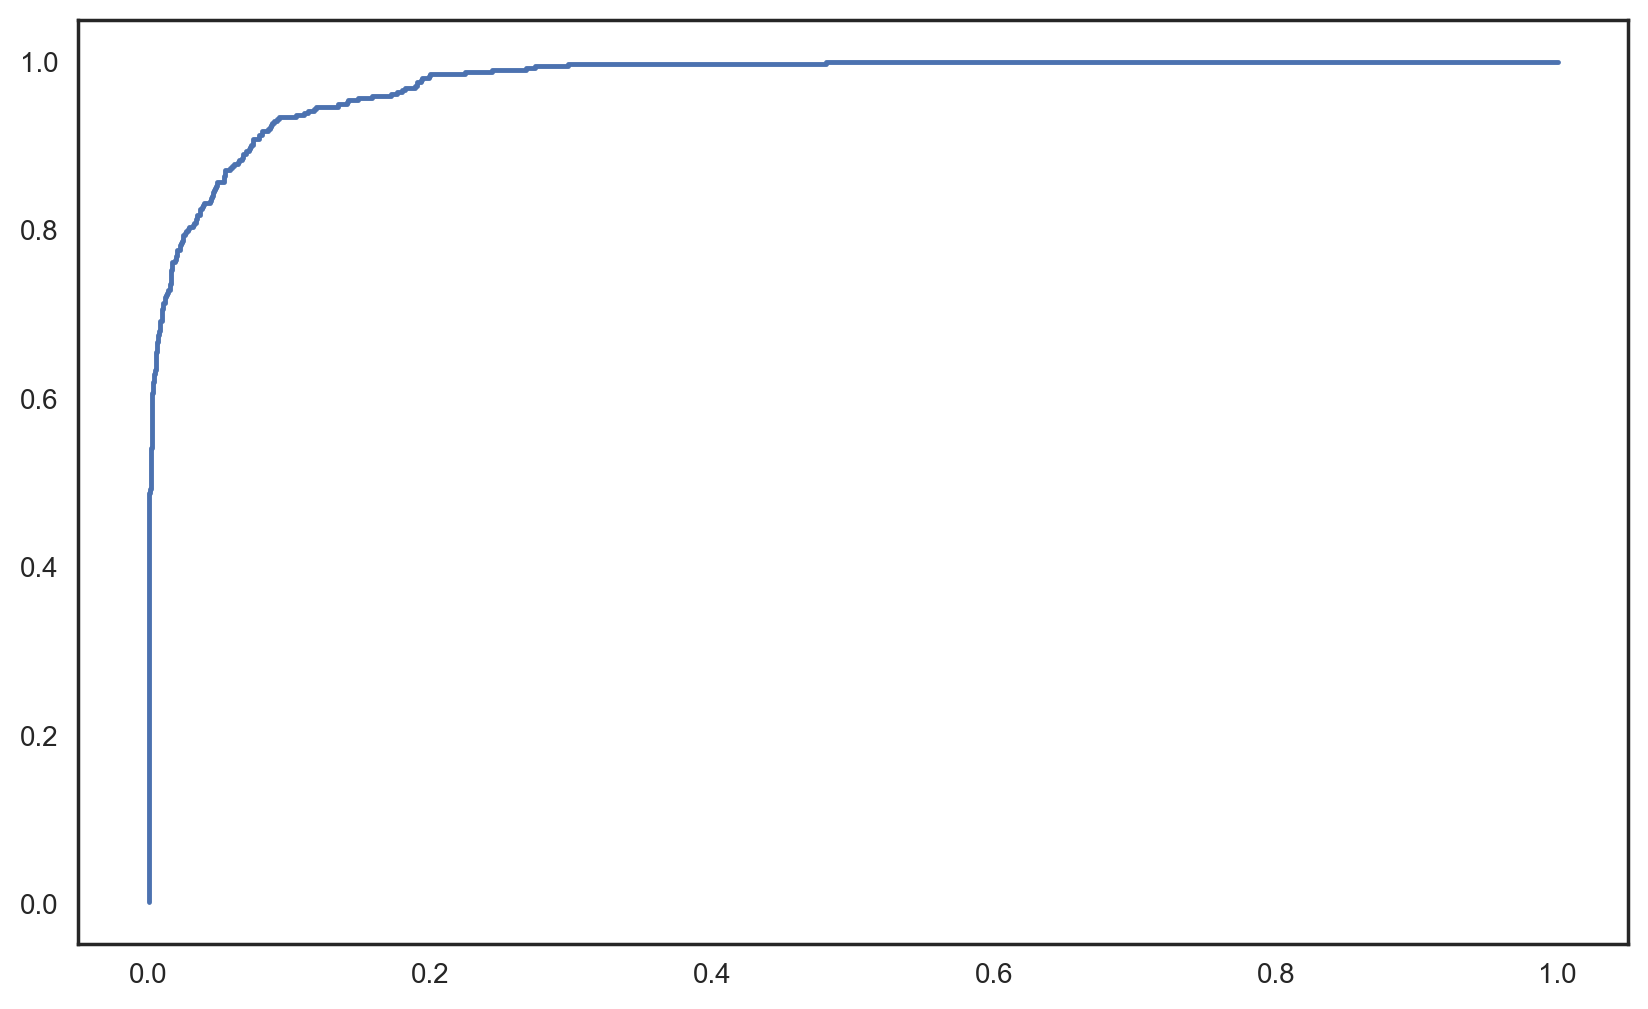

In [23]:
probas_ = cbmft.result.get("model_fit").predict_proba(X)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, probas_[:, 1])
#y_score = cbmft.result.get("model_fit").decision_function(X)

#fpr,tpr,the=sklearn.metrics.roc_curve(test['income'],y_score)
sklearn.metrics.roc_auc_score(y,probas_[:, 1])
plt.plot(fpr,tpr,)